## Introduction

Tennis is an international sport that has sparked a massive following and given rise to several prominent figures who have paved the way for the future success of the game. Arguably one of the most important precursors to one’s success in tennis is their ability to serve. While the competitive nature of tennis often results in long, drawn-out rallies, players are able to score easy points simply through their serving tactics. If a player is able to complete several successful serves, or aces, that their opponent is unable to counterattack, they may quickly find themselves with the upperhand in the game. Whilst much of the logistics behind serving comes from well-thought and practiced approaches, our group was curious as to how much luck can also play into a successful serve. Our group wishes to explore the correlation between successful serves and natural ability by asking the question -  “What is the ideal height of players that will yield the maximum amount of successful serves?” The dataset we will be using to answer our predictive question is titled Game Results for Top 500 Players from 2017-2019, which comes from  https://github.com/JeffSackmann/tennis_atp. 

## Methods

In order to answer our question of identifying the ideal height which yields the most success in terms of serving, we will need to use the height column as it is the variable we wish to predict, as well as the w_ace, winner_svpt, and w_SvGms columns as these three are the most relevant to serving statistics. For our final report we would like to present a bar graph visual that shows an accurate comparison of the implications that height may have on serving. 


### Load Libraries

In [2]:
library(tidyverse)
library(cowplot)
library(scales)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() mask

### Read Data into R

Using the read_csv function, we will read the Tennis Data into R via a relative path. The output of this function will be assigned the name "tennis_data"

In [5]:
tennis_data <- read_csv("atp2017-2019.csv")
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275
6,2019-M020,Brisbane,Hard,32,A,20181231,294,105453,2,⋯,53,37,13,12,6,9,9,3590,19,1835
7,2019-M020,Brisbane,Hard,32,A,20181231,293,104542,NA,⋯,51,34,11,11,6,11,239,200,77,691
8,2019-M020,Brisbane,Hard,32,A,20181231,292,200282,7,⋯,39,30,3,9,3,6,31,1298,72,715


### Extract our variables 

Using the select function we will extract the following columns: winner_ht, w_ace, w_svpt, w_SvGms. These columns will give us useful imformation regarding the service data, such as the number of aces, service points, and service games. It is also important to remember to select the height column as that is ultimately the variable we wish to predict. Next, we will filter each column using !is.na to remove any uneeded N/A values that may appear in our data. The output of select and filter will be assigned the name "useful_col"

In [6]:
useful_col <- select(tennis_data, winner_ht, w_ace, w_svpt, w_SvGms)|>
filter(!is.na(winner_ht))|>
filter(!is.na(w_ace))|>
filter(!is.na(w_svpt))|>
filter(!is.na(w_SvGms))
useful_col

winner_ht,w_ace,w_svpt,w_SvGms
<dbl>,<dbl>,<dbl>,<dbl>
178,3,77,13
178,2,47,8
188,12,68,11
188,10,94,16
178,5,59,12
188,11,64,10
196,21,62,11
188,17,84,15
188,6,63,10


### Convert column to factor

We will be using winner_ht as a categorical variable, so we should convert it into a factor using the as_factor() function. 

In [7]:
tennis <- useful_col |>
  mutate(winner_ht = as_factor(winner_ht)) 


In [8]:
tennis

winner_ht,w_ace,w_svpt,w_SvGms
<fct>,<dbl>,<dbl>,<dbl>
178,3,77,13
178,2,47,8
188,12,68,11
188,10,94,16
178,5,59,12
188,11,64,10
196,21,62,11
188,17,84,15
188,6,63,10


### Using tidymodels to perform k-nearest neighbours

To begin we will split our data into separate testing and training components. The output of the testing data will be assigned the name "tennis_test" and the output of the training data will be assigned the name "tennis_train".

We will then create our recipe specifying the variables we wish to use for classifcation (w_ace, w_svpt, and w_SvGms). Our recipe will be named "tennis_recipe". 

Next we will create a model specification for the K-nearest neighbours classification by using the nearest_neighbor() function. We will specify that we want to set k = 3 and use the straight-line distance. Additionally, we will specify "kknn" for training the model with the set_engine() function. Finally, we will identify that this is a classification problem with the set_mode() function. The output of this will be named "knn_spec".

Finally, we will create a workflow that includes the new recipe (tennis_recipe) and the model specification (knn_spec). We will then fit the output to our tennis_train data and name the output "knn_fit". 


In [9]:
tennis_split <- initial_split(tennis, prop = 0.75, strata = winner_ht)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 
tennis_train
tennis_test

tennis_recipe <- recipe(winner_ht ~ w_ace+w_svpt+w_SvGms, data = tennis_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(knn_spec) |>
  fit(data = tennis_train)


winner_ht,w_ace,w_svpt,w_SvGms
<fct>,<dbl>,<dbl>,<dbl>
178,3,77,13
183,8,98,15
183,7,88,15
183,2,49,9
175,6,104,15
183,4,104,15
208,25,83,12
183,9,107,13
178,5,53,8


winner_ht,w_ace,w_svpt,w_SvGms
<fct>,<dbl>,<dbl>,<dbl>
196,21,62,11
188,6,63,10
188,11,76,11
188,9,76,10
188,7,86,15
185,8,60,10
188,3,42,8
183,3,51,9
185,5,66,11


### Finding the average

Using the summarize function, we will find the average values for the w_ace, w_svpt, and w_SvGms columns.


In [10]:
summarize(tennis,
          mean_w_ace = mean(w_ace),
          mean_w_svpt = mean(w_svpt),
          mean_w_SvGms = mean (w_SvGms))

mean_w_ace,mean_w_svpt,mean_w_SvGms
<dbl>,<dbl>,<dbl>
7.574459,79.75606,12.91407


### Visualizing the Data

Using the training data we will make 3 separate scatterplots that compare the height of the players and their respective service point, aces, and service game statistics.

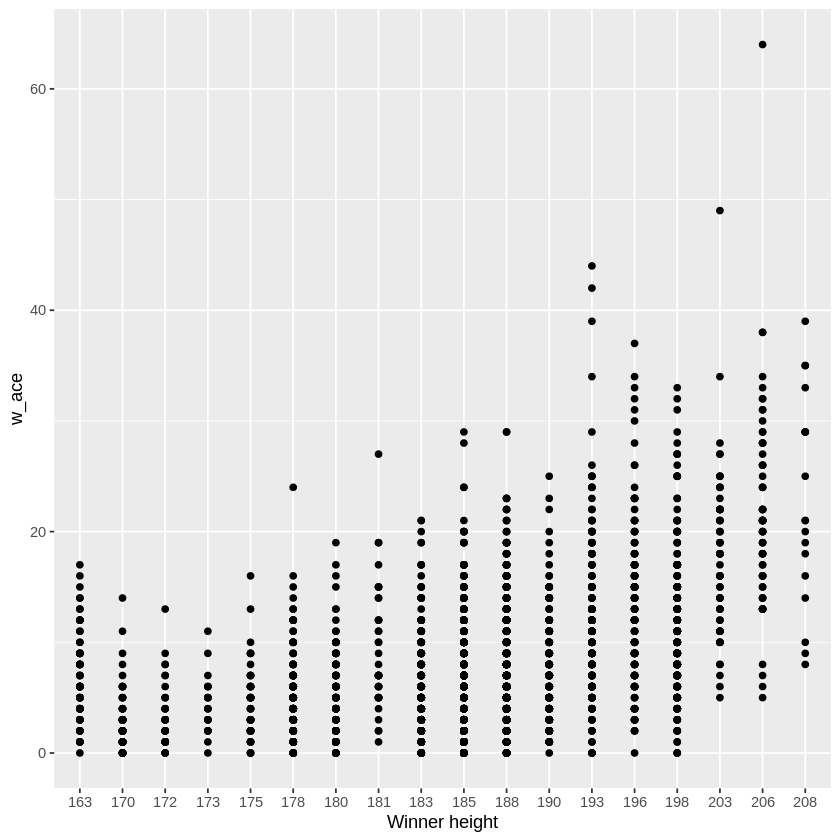

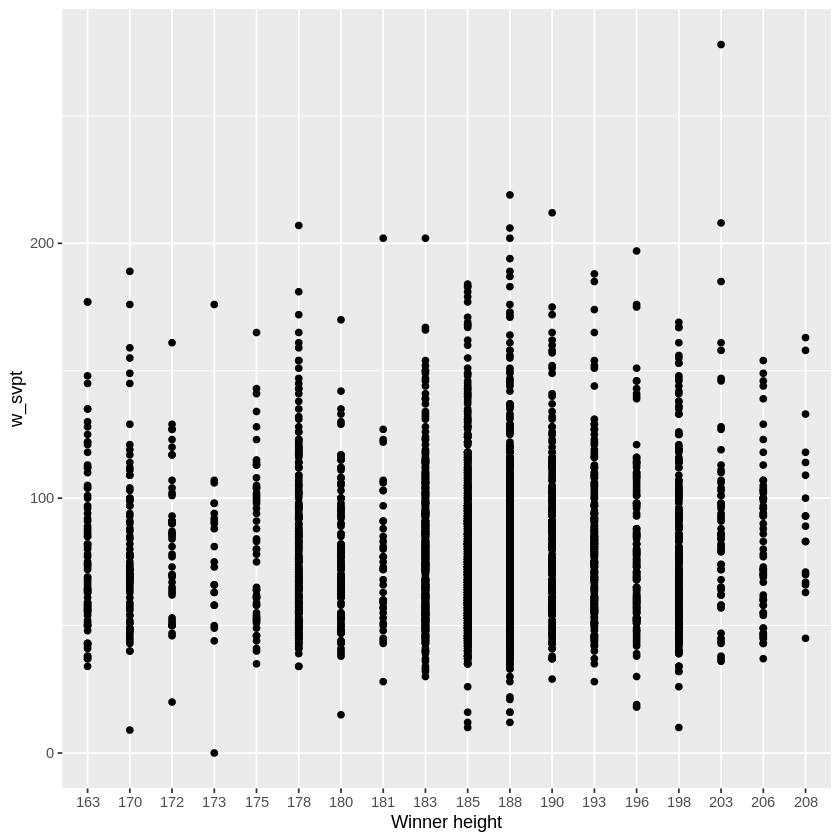

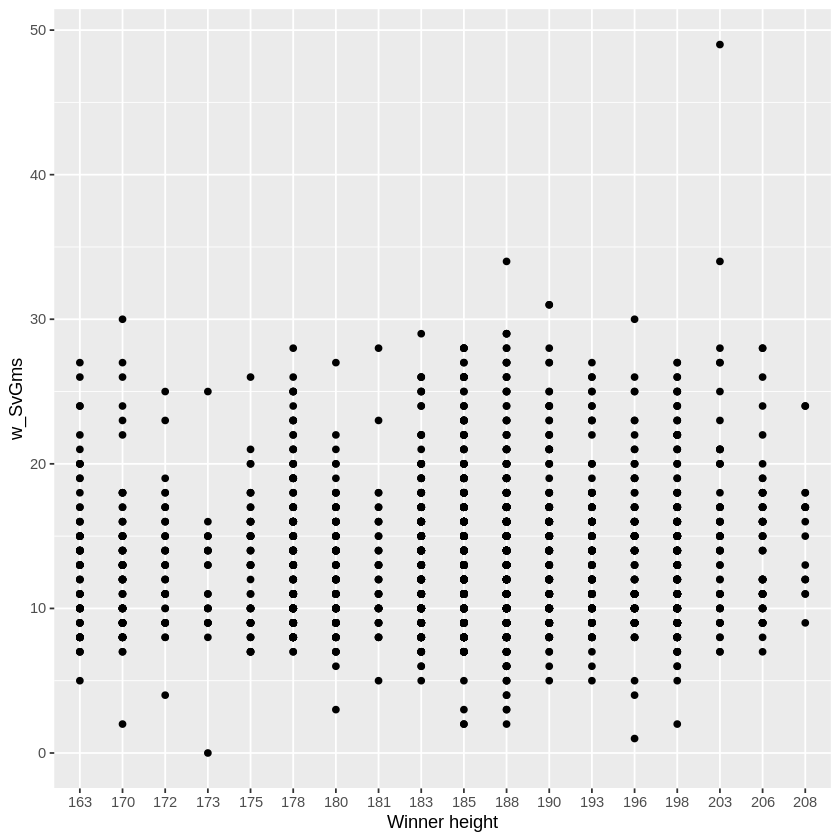

In [11]:
aces_plot <- ggplot(tennis_train, aes(x = winner_ht, y = w_ace)) +
 geom_point()+
xlab("Winner height") +
ylab("Aces")
aces_plot

service_point_plot <- ggplot(tennis_train, aes(x = winner_ht, y = w_svpt)) +
 geom_point()+
xlab("Winner height") +
ylab("Service points")
service_point_plot

service_game_plot <- ggplot(tennis_train, aes(x = winner_ht, y = w_SvGms)) +
 geom_point()+
xlab("Winner height") +
ylab("Service Games")
service_game_plot


## Expected Outcomes and Significance

From our predictive question, we hope to be able to establish the ideal height of players that will yield the most successful serves. Such findings could be useful in predicting the success different players may have in the sport of Tennis based on how closely their height aligns with the ideal value. Our findings could also pave the way for further exploration and investigation into other sports, as we could examine statistics for several athletes and determine whether or not height is a precursor for their success. 
